In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import the CSV file as a DataFrame
df = pd.read_csv('/work/BankChurners.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

## Remove not useful columns

In [3]:
df.drop(columns=['CLIENTNUM', \
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', \
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)

## Dealing with unknowns 

In [4]:
# find the columns that have any missing values
cols_with_missing = df.columns[df.isna().any()].tolist()

# print the columns with missing values
print(cols_with_missing)

[]


In [5]:
# select all non-continuous columns in the DataFrame
non_cont_cols = df.select_dtypes(exclude='number').columns

# print the unique value count for each column
for col in non_cont_cols:
    print(col, ':', df[col].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


### Education_Level unknowns 

In [6]:
education_unknown_count = df['Education_Level'].value_counts()['Unknown']

education_unknown_percentage = (education_unknown_count / len(df)) * 100

education_unknown_percentage

14.999506270366346

In [7]:
# nearly 15% is a significant amount of unknown and therefore we cannot simply get rid of it

df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [8]:
# Create a new column called "Education_Category" based on a column "Education_Level" where values of 'High School', and 'Uneducated' have value 0 in the new column, vs 'Graduate', 'Unknown', 'College', 'Post-Graduate', 'Doctorate' have value 1 in the new column. 
#Notes: split unknown into cat 1 and cat 2 according to perct.  make sure to take a random half

# Create a new column "Education_Category"
df['Education_Category'] = np.where(df['Education_Level'].isin(['High School', 'Uneducated']), 0, 1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Category
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,1
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


In [9]:
df.Education_Category.value_counts()

1    6627
0    3500
Name: Education_Category, dtype: int64

### Marital_Status unknowns

In [10]:
marriage_unknown_count = df['Marital_Status'].value_counts()['Unknown']

marriage_unknown_percentage = (marriage_unknown_count / len(df)) * 100

marriage_unknown_percentage

7.3960699121161255

In [11]:
# 7% unknown values are not necessarily significant, we can simply change the unknown to the most frequent value in this column. 
df.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

##### Impute the missing values based on the distribution of the known values. I will calculate the percentage of "Married", "Single", and "Divorced" values among the non-missing values, and then use those percentages to randomly assign the missing values to one of the categories. 

In [12]:

# # Calculate the percentage of non-missing values in each category
# married_count = df['Marital_Status'].value_counts()['Married']
# single_count = df['Marital_Status'].value_counts()['Single']
# divorced_count = df['Marital_Status'].value_counts()['Divorced']
# total_count = married_count + single_count + divorced_count
# married_pct = married_count / total_count
# single_pct = single_count / total_count
# divorced_pct = divorced_count / total_count

# # Normalize the probabilities
# pcts = np.array([married_pct, single_pct, divorced_pct])
# pcts /= pcts.sum()

# # Replace the "Unknown" values with a randomly chosen category
# unknown_mask = df['Marital_Status'] == 'Unknown'
# n_unknown = unknown_mask.sum()
# replacement = np.random.choice(['Married', 'Single', 'Divorced'], size=n_unknown, p=pcts)
# df.loc[unknown_mask, 'Marital_Status'] = replacement

# df.Marital_Status.value_counts()


Married     5041
Single      4283
Divorced     803
Name: Marital_Status, dtype: int64

In [13]:
# Replace all 'Unknown' values with randomly selected values from the known distribution.

# Calculate the distribution of the known values
marital_distribution = df[df['Marital_Status'] != 'Unknown']['Marital_Status'].value_counts(normalize=True)

# Replace the 'Unknown' values with randomly selected values from the known distribution
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: np.random.choice(marital_distribution.index, p=marital_distribution.values) if x == 'Unknown' else x)

df.Marital_Status.value_counts()

Married     5062
Single      4250
Divorced     815
Name: Marital_Status, dtype: int64

#### Income_Category unknowns

In [14]:
income_unknown_count = df['Income_Category'].value_counts()['Unknown']

income_unknown_percentage = (income_unknown_count / len(df)) * 100

income_unknown_percentage

10.980547052434087

In [15]:
income_unknown_count

1112

In [16]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [17]:
# break up Unknown according to percentage of income category 

pd.crosstab(df.Income_Category,df.Education_Level)

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Income_Category,,,,,,,
$120K +,70,37,204,147,30,119,120
$40K - $60K,183,70,553,355,111,249,269
$60K - $80K,132,59,422,307,77,195,210
$80K - $120K,175,57,478,308,81,217,219
Less than $40K,345,158,1139,671,170,522,556
Unknown,108,70,332,225,47,185,145


In [18]:
# create a crosstab table
table = pd.crosstab(df['Education_Level'], df['Marital_Status'], 
                    values=(df['Income_Category'] == 'Unknown'), aggfunc='sum')

print(table)


Marital_Status   Divorced  Married  Single
Education_Level                           
College                11       51      46
Doctorate               6       39      25
Graduate               31      163     138
High School            14      111     100
Post-Graduate           4       25      18
Uneducated             23       86      76
Unknown                10       62      73


In [19]:
# Pay attention to HS single/married, graduate single/married have the highest frequency in unknown income (over 100). figure out what is the most common income for people with graduate degree who are married 

filtered_df = df[((df['Education_Level'] == 'Graduate') | (df['Education_Level'] == 'High School'))
                 & ((df['Marital_Status'] == 'Married') | (df['Marital_Status'] == 'Single'))]
grouped_df = filtered_df.groupby(['Income_Category']).size().reset_index(name='count')
sorted_df = grouped_df.sort_values('count', ascending=False)
most_common_income = sorted_df['Income_Category'].iloc[0]

most_common_income

'Less than $40K'

In [20]:
# Impute the missing values based on the distribution of the known values, just like marital_status

# Calculate the distribution of the known values
income_distribution = df[df['Income_Category'] != 'Unknown']['Income_Category'].value_counts(normalize=True)

# Replace the 'Unknown' values with randomly selected values from the known distribution
df['Income_Category'] = df['Income_Category'].apply(lambda x: np.random.choice(income_distribution.index, p=income_distribution.values) if x == 'Unknown' else x)


df.Income_Category.value_counts()

Less than $40K    3972
$40K - $60K       2007
$80K - $120K      1727
$60K - $80K       1596
$120K +            825
Name: Income_Category, dtype: int64

## Box plots for numerical value

### 

use chi_square for correlations between 2 categorical vairables 

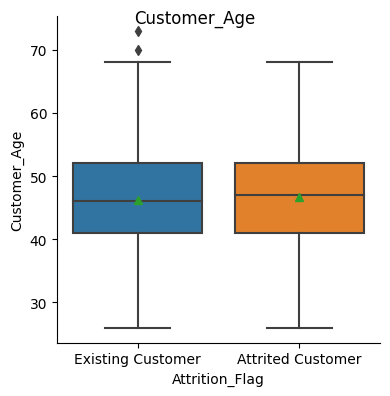

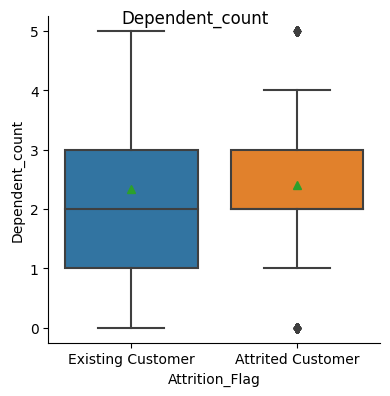

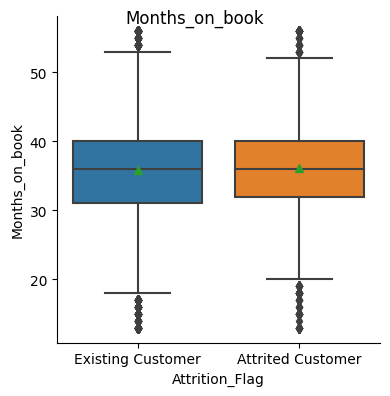

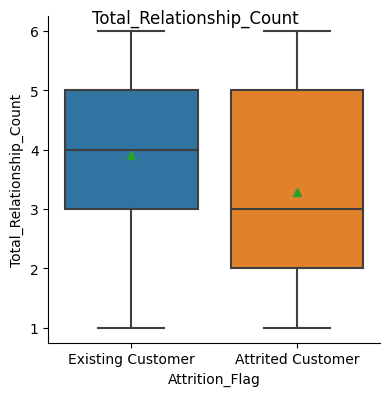

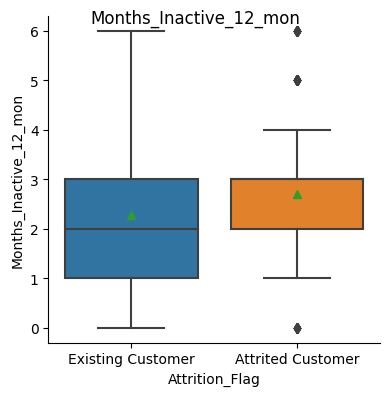

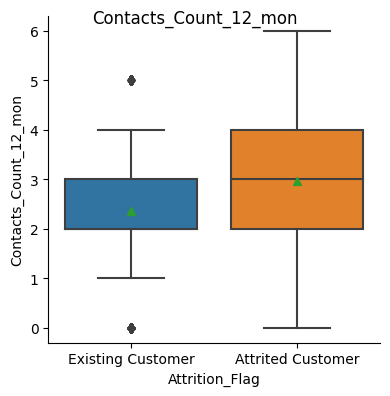

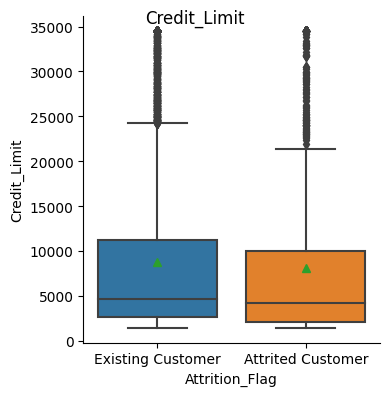

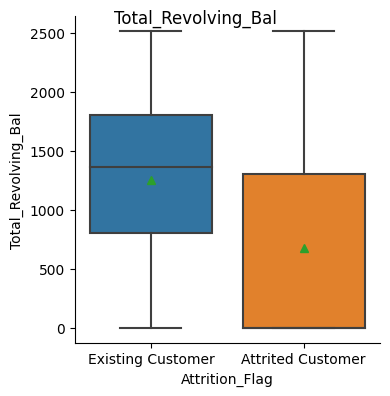

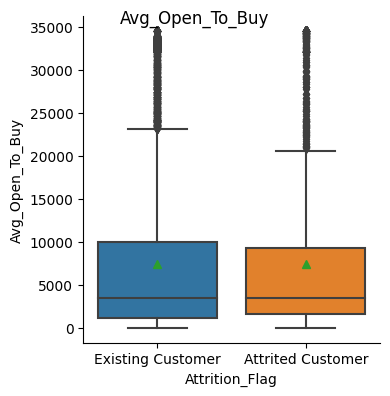

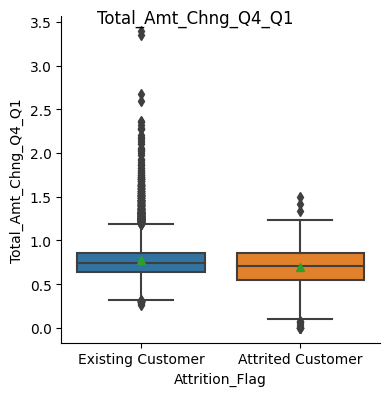

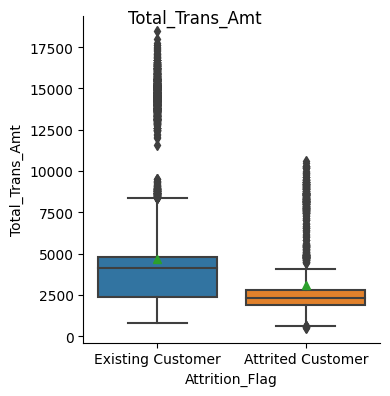

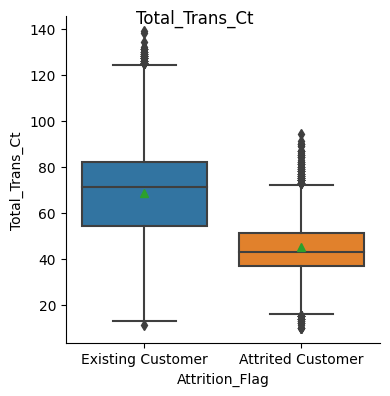

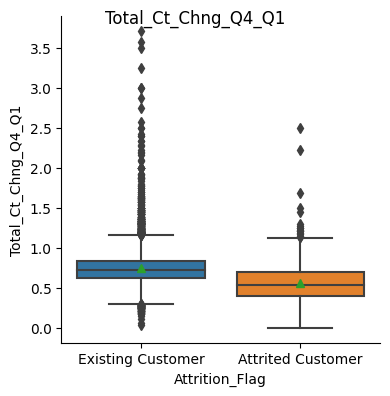

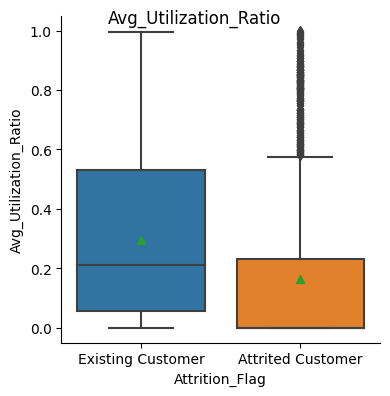

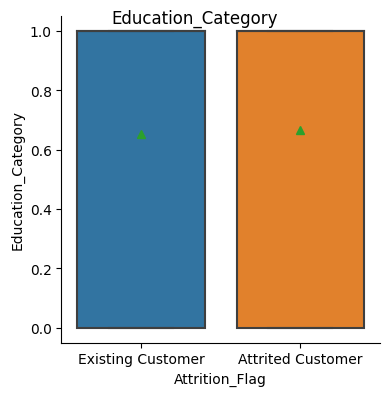

In [21]:
# get the columns that are float or integer
numeric_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()

#  we loop through each column in numeric_columns and create a FacetGrid using 
#  Seaborn's catplot() function. We set x='Attrition_Flag' to split the plot by 
#  whether a customer is existing or attrited, y=column to plot the values in 
#  the selected column, and kind='box' to create a boxplot.

# create a FacetGrid of boxplots for each numeric column
for column in numeric_columns:
    grid = sns.catplot(data=df, x='Attrition_Flag', y=column, kind='box',showmeans = True, height=4, aspect=1)
    # The height parameter controls the height of each facet (i.e., the height of each individual boxplot), and the aspect parameter controls the aspect ratio of each facet (i.e., the width of each individual boxplot).
    grid.fig.suptitle(column)

# show the plot
plt.show()
  


The dependent count the attrited  customer has outliers and the median line not being displayed shows that it is equal to either lower or upper quartile.

The existing customer covers a large range as evidenced by the minimums and maximums. The 1st quartile of the existing customer matches the minimum of the attrited  customer. The median of the existing customer matches the lower quartile of the attrited customer. The upper quartiles appear to match.

## Create a heatmap to visualize the correlation between columns


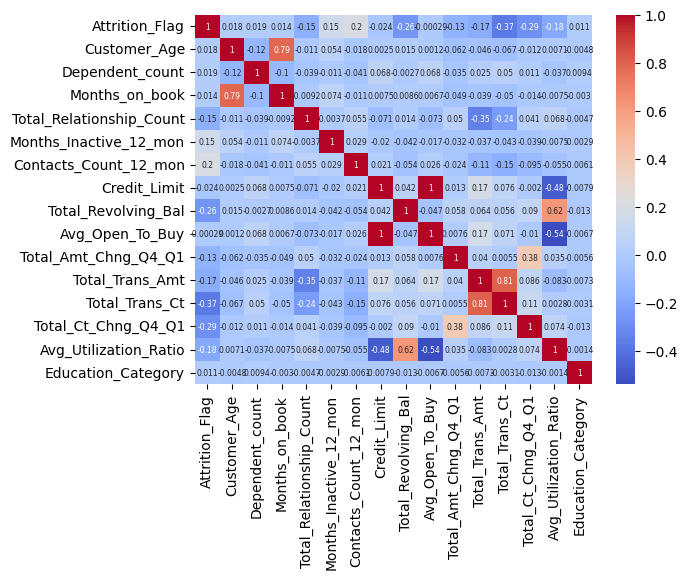

In [22]:
# decode the Attrition_Flag (target variable) column and turn "Existing Customer" to 1 
# and "Attrited Customer" to 0
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer": 0, \
"Attrited Customer": 1})

# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":5.5},cmap='coolwarm')

# show the plot
plt.show()

In [23]:
df = df.drop(['Avg_Open_To_Buy'],axis = 1)


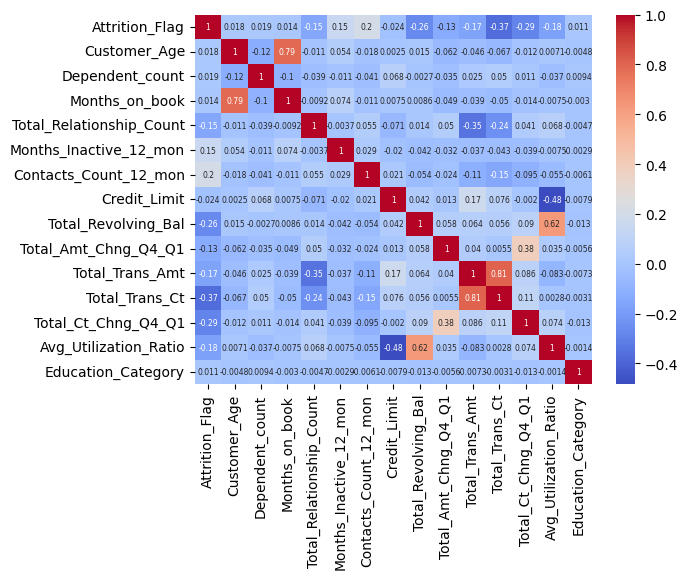

In [24]:
# create a correlation matrix
corr_matrix = df.corr()

# create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize":5.5},cmap='coolwarm')

# show the plot
plt.show()

cmap='coolwarm' sets the color map of the heatmap to a blue-to-red gradient.

Darker colors indicating stronger positive or negative correlation.

Highly correlated pairs include: Customer_Age and Months_on_book, Credit_Limit and Avg_Utilization_Ratio, Total_Revolving_Bal and Avg_Utilization_Ratio, Avg_Open_To_Buy and Avg_Utilization_Ratio, Credit_Limit and Avg_Open_To_Buy (1:1).

### Balance data based on 'Attrition_Flag' (target variable)

In [25]:
# count the number of rows with Attrition_Flag == 1 and 0
counts = df['Attrition_Flag'].value_counts()

# determine the minimum count between the two values
min_count = min(counts)

# group the data by the "Attrition_Flag" column 
# and use the sample function to randomly select the same number of rows for each value of Attrition_Flag
# finally combine the randomly selected rows for each group into a single DataFrame
df_balanced = df.groupby('Attrition_Flag', group_keys=False).apply(lambda x: x.sample(min_count))

# show the balanced data
df_balanced

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Category
415,0,49,M,2,Post-Graduate,Married,$60K - $80K,Blue,38,3,2,0,8077.0,1965,0.637,1329,26,0.444,0.243,1
151,0,68,M,1,Graduate,Married,$40K - $60K,Blue,56,5,2,3,13860.0,1652,1.255,1910,32,1.909,0.119,1
1559,0,39,M,4,High School,Married,$60K - $80K,Blue,28,5,3,3,6224.0,1898,1.103,3014,58,0.706,0.305,0
1648,0,38,M,2,Graduate,Married,$80K - $120K,Blue,29,5,3,3,7535.0,2517,0.813,1655,41,0.577,0.334,1
5521,0,48,F,3,College,Single,$40K - $60K,Blue,37,6,3,1,1438.3,0,0.777,5035,76,0.767,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,1,56,F,1,Graduate,Single,$40K - $60K,Blue,37,2,4,3,2339.0,0,0.493,1542,45,0.607,0.000,1
6719,1,35,F,4,Graduate,Married,Less than $40K,Blue,36,4,3,3,1931.0,0,0.695,2569,46,0.394,0.000,1
4189,1,45,F,3,High School,Single,$40K - $60K,Blue,35,3,2,6,3512.0,2517,0.597,1801,48,0.548,0.717,0
3094,1,49,M,4,Graduate,Single,$60K - $80K,Blue,36,1,4,5,5662.0,1484,0.434,1693,25,0.250,0.262,1


<Figure size 400x300 with 0 Axes>

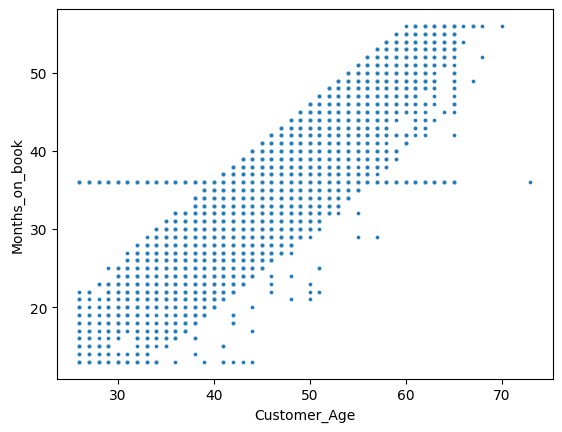

<Figure size 400x300 with 0 Axes>

In [26]:
sns.scatterplot(x = df['Customer_Age'], y = df['Months_on_book'], s=8)
plt.figure(figsize=(4, 3))

<Figure size 400x300 with 0 Axes>

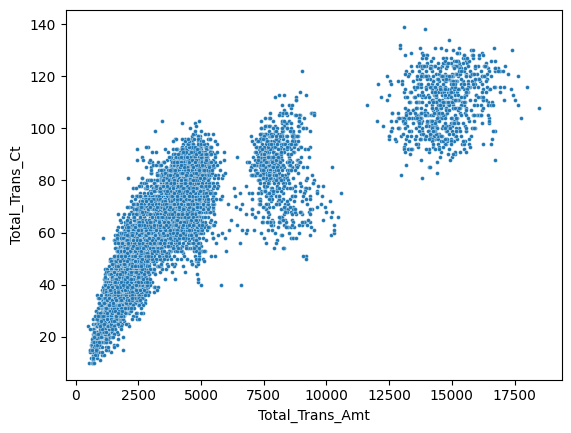

<Figure size 400x300 with 0 Axes>

In [27]:
sns.scatterplot(x = df['Total_Trans_Amt'], y = df['Total_Trans_Ct'], s=8)
plt.figure(figsize=(4, 3))

eliminate the duplicate with strong correlation

VIF - check scores in multicollinearity, e.g. if >10 remove them. and retry the model to see if it is better. Play with different threshold 

<Figure size 400x300 with 0 Axes>

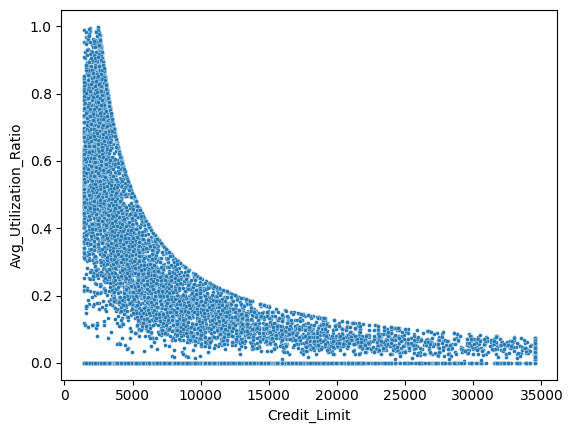

<Figure size 400x300 with 0 Axes>

In [28]:
sns.scatterplot(x = df['Credit_Limit'], y = df['Avg_Utilization_Ratio'], s=8)
plt.figure(figsize=(4, 3))

<Figure size 400x300 with 0 Axes>

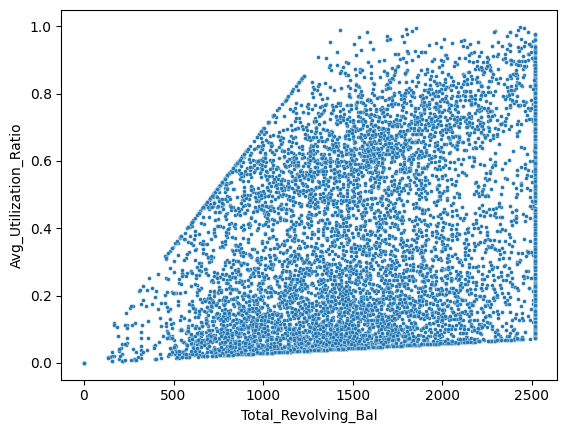

<Figure size 400x300 with 0 Axes>

In [29]:
sns.scatterplot(x = df['Total_Revolving_Bal'], y = df['Avg_Utilization_Ratio'], s=8)
plt.figure(figsize=(4, 3))

![Picture title](image-20230608-212046.png)

In [30]:
df = df.drop(['Months_on_book'],axis = 1)

### Data type 'object' - converting categorical variables to numerical variables

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

One-hot encoding and label encoding are two techniques for converting categorical variables to numerical variables.

Label Encoding: Label encoding is a technique for encoding categorical variables as integer values. In label encoding, each category is assigned a unique integer value. Label encoding is simple and efficient, but it can lead to problems when the numerical values are interpreted as ordinal values, where one category is considered "greater than" or "less than" another.

One-hot Encoding: One-hot encoding is a technique for encoding categorical variables as binary vectors. In one-hot encoding, each category is converted to a binary vector where each element represents a possible category value. One-hot encoding is useful when there is no intrinsic ordering between the categories, as it avoids the problems of label encoding.

      other than correlation, another way to select variable - can also use random forest classification (include all variables) , to get feature importance. and use those variables to do regression 

There is no ordinal relationship between categories in marital status and gender, so get_dummies() is used to perform one-hot encoding.

In [32]:
df = pd.get_dummies(df, columns=['Gender', 'Marital_Status','Income_Category','Card_Category'],drop_first=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Education_Level                 10127 non-null  object 
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

In [34]:
df = df.select_dtypes(exclude='object')

### Chi Squares

The chi-square statistic measures the strength of the association between the Attrition_Flag variable and the categorical variable being tested. The p-value indicates the statistical significance of the association.

In [35]:
from scipy.stats import chi2_contingency

In [36]:
# select the relevant columns 
cols = ['Attrition_Flag', 'Dependent_count', 'Education_Category','Gender_M', 'Marital_Status_Married', 
        'Marital_Status_Single', 'Income_Category_$40K - $60K','Income_Category_$60K - $80K',
        'Income_Category_$80K - $120K','Income_Category_Less than $40K','Card_Category_Gold',
        'Card_Category_Platinum','Card_Category_Silver']
df_demograph = df[cols]

# iterate over the columns starting from the second column (since the first column is the Attrition_Flag variable)
for col in cols[1:]:
    # perform the chi-square test for each variable using the chi2_contingency function
    # The contingency table for each variable is created using the pd.crosstab function
    contingency_table = pd.crosstab(df_demograph['Attrition_Flag'], df_demograph[col])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic = {chi2}")
    print(f"p-value = {p}")
    print("===")

Chi-square test results for Dependent_count:
Chi-square statistic = 9.476429774498301
p-value = 0.09150463456682643
===
Chi-square test results for Education_Category:
Chi-square statistic = 1.145427382030417
p-value = 0.28450840847358994
===
Chi-square test results for Gender_M:
Chi-square statistic = 13.86561370063734
p-value = 0.00019635846717310307
===
Chi-square test results for Marital_Status_Married:
Chi-square statistic = 3.3382109685975347
p-value = 0.06768816799477427
===
Chi-square test results for Marital_Status_Single:
Chi-square statistic = 3.4140004707695484
p-value = 0.06464555106065348
===
Chi-square test results for Income_Category_$40K - $60K:
Chi-square statistic = 0.7720765480166307
p-value = 0.3795754212190219
===
Chi-square test results for Income_Category_$60K - $80K:
Chi-square statistic = 8.786716200929659
p-value = 0.003034319632329987
===
Chi-square test results for Income_Category_$80K - $120K:
Chi-square statistic = 0.004762710641192944
p-value = 0.9449797

If the p-value is less than or equal to the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the Attrition_Flag variable and the categorical variable being tested.

If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant association between the Attrition_Flag variable and the categorical variable being tested.

In addition to the p-value, we can also look at the effect size of the association, which is measured by the strength of the chi-square statistic. A larger chi-square statistic indicates a stronger association between the variables.

If the chi-square statistic is very large and the p-value is very small, we can conclude that there is a very strong association between the variables.

If the chi-square statistic is small and the p-value is large, we can conclude that there is a weak or no association between the variables.

Note that the chi-square test only tells us that there is an association between the variables, but it does not tell us about the direction or nature of the association. To explore the nature of the association, we can use other statistical tests or visualization techniques.

Gender_M has the strongest association. 

A Chi-square statistic of 0.0 suggests that the observed frequencies are exactly what would be expected under the null hypothesis of no association between the two variables. The p-value of 1.0 confirms this, indicating that the null hypothesis cannot be rejected at any reasonable level of significance.

Overall, these results suggest that there is no evidence to suggest that people in the "$80K - $120K" income category differ significantly in their categorical response compared to other income categories in the data set.

In [37]:
df

,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Gender_M,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,5,1,3,12691.0,777,1.335,1144,...,1,1,0,0,1,0,0,0,0,0
1,0,49,5,6,1,2,8256.0,864,1.541,1291,...,0,0,1,0,0,0,1,0,0,0
2,0,51,3,4,1,0,3418.0,0,2.594,1887,...,1,1,0,0,0,1,0,0,0,0
3,0,40,4,3,4,1,3313.0,2517,1.405,1171,...,0,1,0,0,0,0,1,0,0,0
4,0,40,3,5,1,0,4716.0,0,2.175,816,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,3,2,3,4003.0,1851,0.703,15476,...,1,0,1,1,0,0,0,0,0,0
10123,1,41,2,4,2,3,4277.0,2186,0.804,8764,...,1,0,0,1,0,0,0,0,0,0
10124,1,44,1,5,3,4,5409.0,0,0.819,10291,...,0,1,0,0,0,0,1,0,0,0
10125,1,30,2,4,3,3,5281.0,0,0.535,8395,...,1,1,0,1,0,0,0,0,0,0


## Saving the file

In [38]:
# Save the DataFrame to a file, overwriting the old file if it exists
file_name = "Cleaned_data.csv"
df.to_csv(file_name, index=False) # index=False is used to not include the index column in the saved file

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=16ef2eef-7a77-40f1-9ae1-203f463f76ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>